In [9]:
%matplotlib inline

from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# 1. Compute ROOT
ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
print("ROOT:", ROOT)

# 2. Add ROOT to sys.path for this kernel
root_str = str(ROOT.resolve())
if root_str not in sys.path:
    sys.path.append(root_str)

print("sys.path has ROOT?", root_str in sys.path)
print("src exists?", (ROOT / "src").exists())
print("interpretation.py exists?", (ROOT / "src" / "interpretation.py").exists())


print("CWD:", Path.cwd())
print("ROOT:", ROOT)
print("sys.path has ROOT?", root_str in sys.path)
print("src exists?", (ROOT / "src").exists())
print("interpretation.py exists?", (ROOT / "src" / "interpretation.py").exists())

# 3. Import plotting helpers
from src.interpretation import (
    plot_feature_importances,
    plot_logistic_coefficients,
)


# make sure ROOT is already defined correctly
models_dir = ROOT / "models"
models_dir.mkdir(exist_ok=True)

print("Saving to:", models_dir)


# 4. Load data
df_loans_fe = pd.read_csv(ROOT / "data" / "processed" / "loan_default_features.csv")
df_credit_fe = pd.read_csv(ROOT / "data" / "processed" / "credit_risk_features.csv")

print("Exists models/:", (ROOT / "models").exists())
print("Contents of models/:", list((ROOT / "models").glob("*.joblib")))


df_loans_fe = pd.read_csv(ROOT / "data" / "processed" / "loan_default_features.csv")
df_credit_fe = pd.read_csv(ROOT / "data" / "processed" / "credit_risk_features.csv")

print("ROOT:", ROOT)
print("Exists:", (ROOT / "models").exists())
print("Contents of models:", list((ROOT / "models").glob("*.joblib")))



ROOT: /Users/erincheng/Desktop/credit-risk-analysis
sys.path has ROOT? True
src exists? True
interpretation.py exists? True
CWD: /Users/erincheng/Desktop/credit-risk-analysis/notebooks
ROOT: /Users/erincheng/Desktop/credit-risk-analysis
sys.path has ROOT? True
src exists? True
interpretation.py exists? True
Saving to: /Users/erincheng/Desktop/credit-risk-analysis/models
Exists models/: True
Contents of models/: [PosixPath('/Users/erincheng/Desktop/credit-risk-analysis/models/credit_gb.joblib'), PosixPath('/Users/erincheng/Desktop/credit-risk-analysis/models/loan_rf.joblib'), PosixPath('/Users/erincheng/Desktop/credit-risk-analysis/models/credit_rf.joblib'), PosixPath('/Users/erincheng/Desktop/credit-risk-analysis/models/loan_gb.joblib'), PosixPath('/Users/erincheng/Desktop/credit-risk-analysis/models/loan_log_reg.joblib'), PosixPath('/Users/erincheng/Desktop/credit-risk-analysis/models/credit_log_reg.joblib')]
ROOT: /Users/erincheng/Desktop/credit-risk-analysis
Exists: True
Contents of

In [10]:
loan_log_reg = joblib.load(ROOT / "models" / "loan_log_reg.joblib")
loan_rf      = joblib.load(ROOT / "models" / "loan_rf.joblib")
loan_gb      = joblib.load(ROOT / "models" / "loan_gb.joblib")

credit_log_reg = joblib.load(ROOT / "models" / "credit_log_reg.joblib")
credit_rf      = joblib.load(ROOT / "models" / "credit_rf.joblib")
credit_gb      = joblib.load(ROOT / "models" / "credit_gb.joblib")

In [11]:
datasets = {
    "loan_default": {
        "df": df_loans_fe,
        "target": "default",
        "models": {
            "Logistic Regression": loan_log_reg,
            "Random Forest":      loan_rf,
            "Gradient Boosting":  loan_gb,
        },
        "feature_cols": [
            "age", "income", "loan_amount", "credit_score",
            "months_employed", "num_credit_lines",
            "interest_rate", "loan_term", "dti_ratio",
        ],
    },
    "credit_risk": {
        "df": df_credit_fe,
        "target": "default_flag",
        "models": {
            "Logistic Regression": credit_log_reg,
            "Random Forest":      credit_rf,
            "Gradient Boosting":  credit_gb,
        },
        # For now, only plot the 7 known numeric features
        "feature_cols": [
            "person_age", "person_income", "person_emp_length",
            "loan_amnt", "loan_int_rate", "loan_percent_income",
            "cb_person_cred_hist_length",
        ],
    },
}


/Users/erincheng/Desktop/credit-risk-analysis/src/interpretation.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


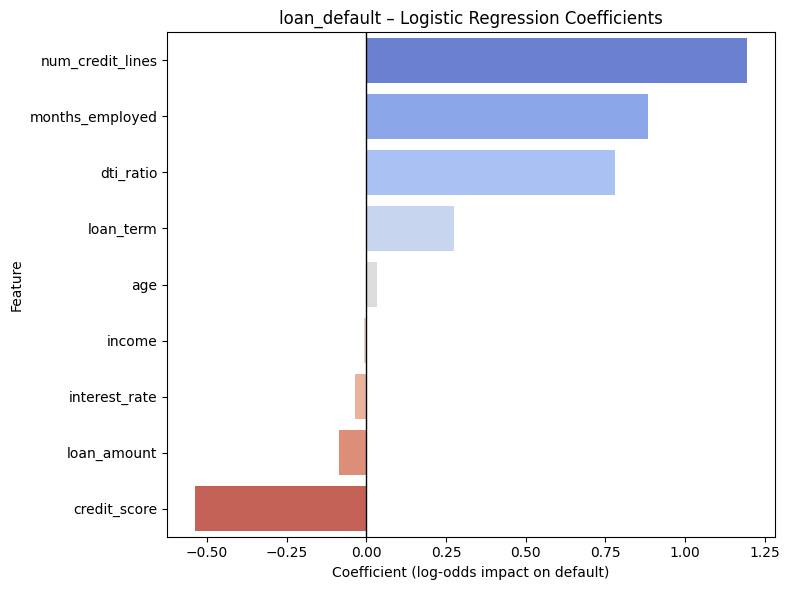

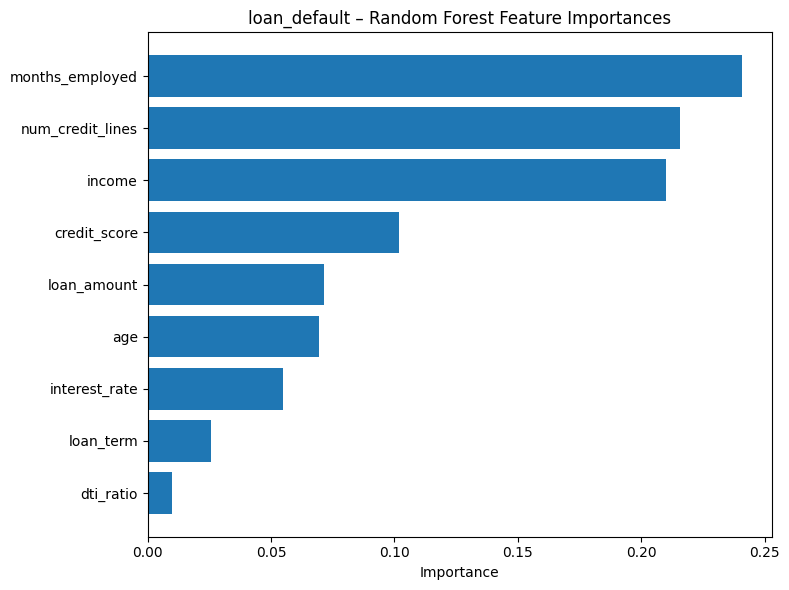

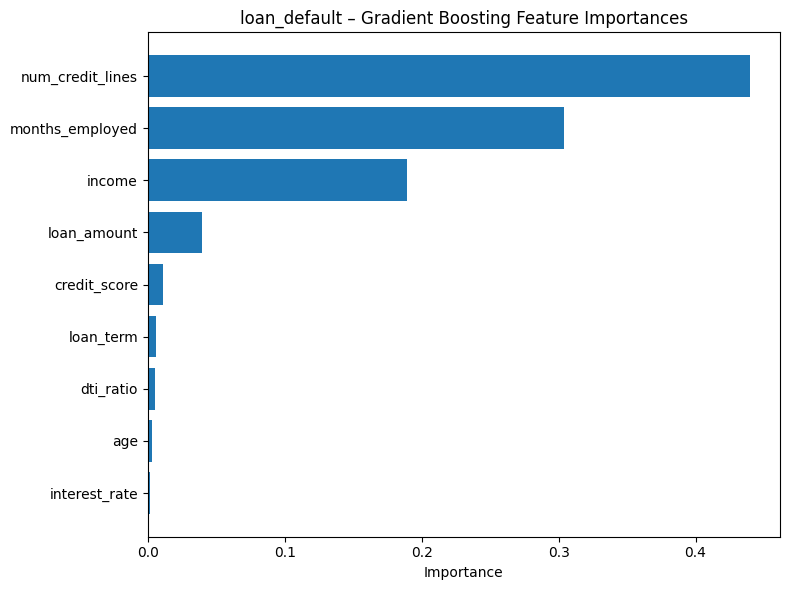

/Users/erincheng/Desktop/credit-risk-analysis/src/interpretation.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


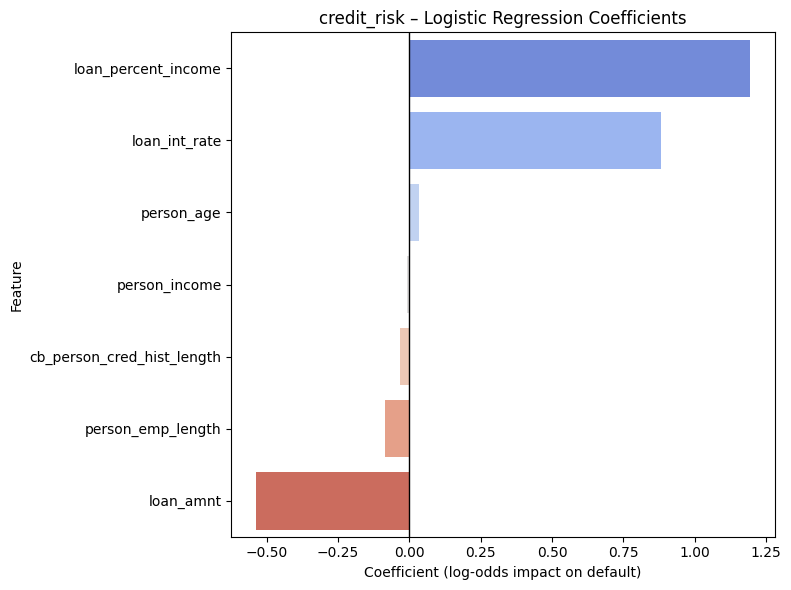

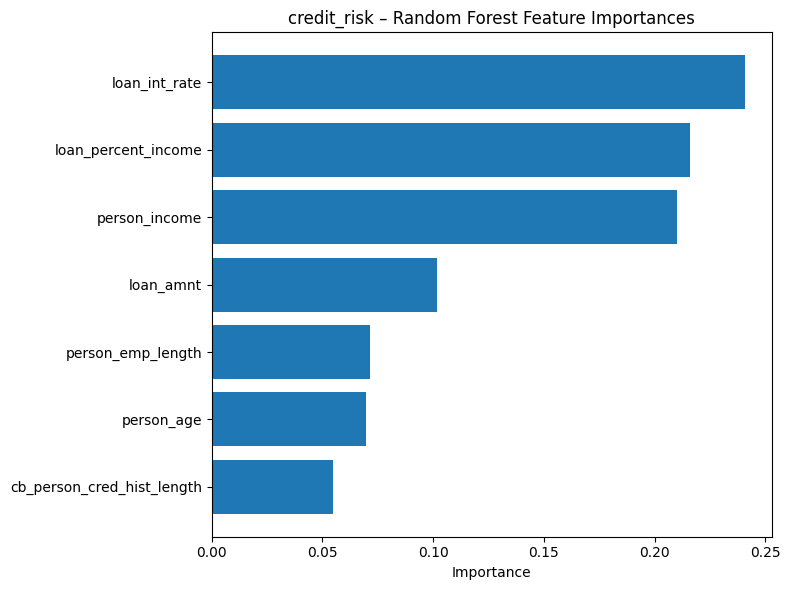

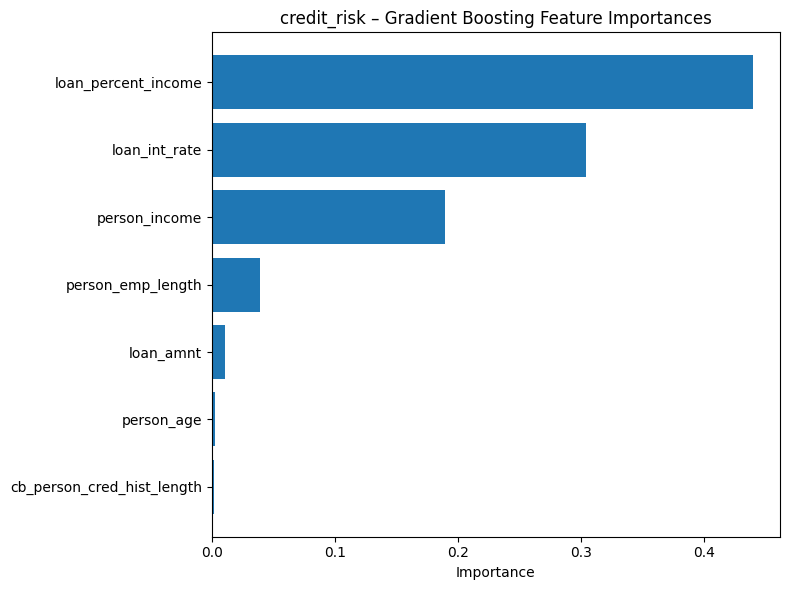

In [12]:
for ds_name, cfg in datasets.items():
    models = cfg["models"]
    feature_cols = cfg["feature_cols"]

    plot_logistic_coefficients(
        model=models["Logistic Regression"],
        feature_cols=feature_cols,
        title_prefix=ds_name,
    )

    plot_feature_importances(
        model=models["Random Forest"],
        feature_cols=feature_cols,
        title_prefix=ds_name,
        model_name="Random Forest",
    )

    plot_feature_importances(
        model=models["Gradient Boosting"],
        feature_cols=feature_cols,
        title_prefix=ds_name,
        model_name="Gradient Boosting",
    )


In [13]:
# loan_default models
joblib.dump(loan_log_reg, models_dir / "loan_log_reg.joblib")
joblib.dump(loan_rf,      models_dir / "loan_rf.joblib")
joblib.dump(loan_gb,      models_dir / "loan_gb.joblib")

# credit_risk models
joblib.dump(credit_log_reg, models_dir / "credit_log_reg.joblib")
joblib.dump(credit_rf,      models_dir / "credit_rf.joblib")
joblib.dump(credit_gb,      models_dir / "credit_gb.joblib")


['/Users/erincheng/Desktop/credit-risk-analysis/models/credit_gb.joblib']